## EDA Notebook

In [126]:
#Importing the json file
import json
file_path = 'wikisql_train.json'
with open(file_path, 'r') as file:
    data = json.load(file)

#### Converting the data into a more readable format (csv) and performing some basic EDA

In [127]:
import csv
csv_file_path = 'sql.csv'
field_names = ['question', 'answer']
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.DictWriter(csvfile, fieldnames=field_names)
    csv_writer.writeheader()
    csv_writer.writerows({k: v for k, v in row.items() if k in field_names} for row in data)

#### Importing Libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [129]:
df = pd.read_csv('sql.csv')

In [130]:
df.head()

,question,answer
0,Tell me what the notes are for South Australia,SELECT Notes FROM table WHERE Current slogan = SOUTH AUSTRALIA
1,What is the current series where the new series began in June 2011?,SELECT Current series FROM table WHERE Notes = New series began in June 2011
2,What is the format for South Australia?,SELECT Format FROM table WHERE State/territory = South Australia
3,Name the background colour for the Australian Capital Territory,SELECT Text/background colour FROM table WHERE State/territory = Australian Capital Territory
4,how many times is the fuel propulsion is cng?,SELECT COUNT Fleet Series (Quantity) FROM table WHERE Fuel Propulsion = CNG


In [131]:
# Assuming 'question' and 'answer' are the column names
df['question_word_count'] = df['question'].apply(lambda x: len(str(x).split()))
df['answer_word_count'] = df['answer'].apply(lambda x: len(str(x).split()))

## Exploratory Data Analysis (EDA)

#### 1. Length of Questions and respective Answers

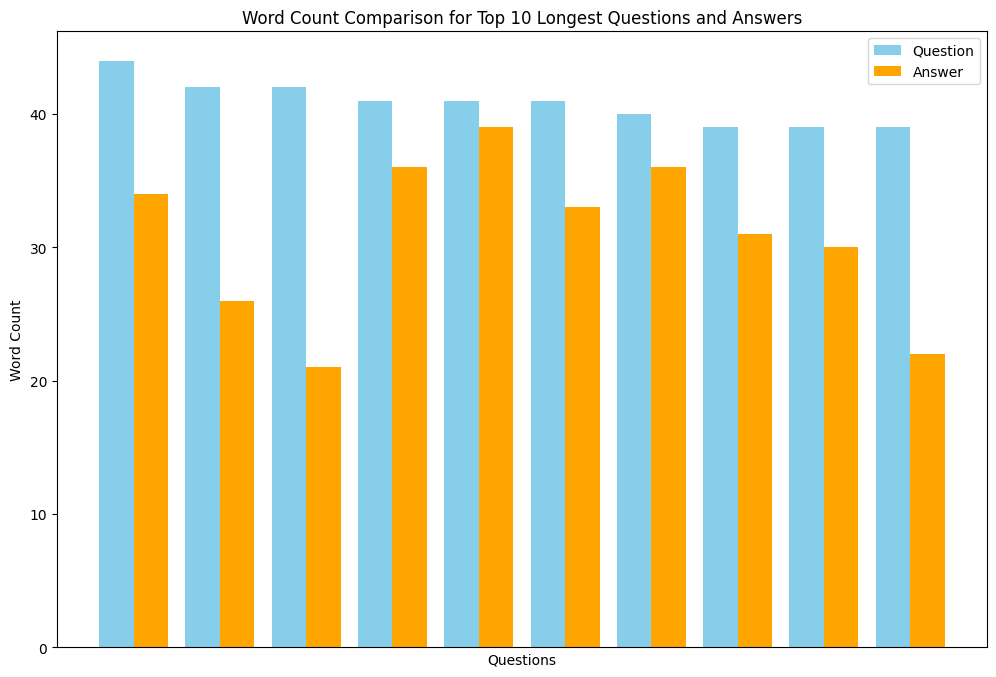

In [132]:
top_10_longest_questions = df.nlargest(10, 'question_word_count')
# Generate positions for bars
bar_positions = np.arange(len(top_10_longest_questions))

# Plotting grouped bar graph
plt.figure(figsize=(12, 8))

# Bar plot for question word count
plt.bar(bar_positions - bar_width/2, top_10_longest_questions['question_word_count'], width=bar_width, label='Question', color='skyblue')

# Bar plot for answer word count next to questions
plt.bar(bar_positions + bar_width/2, top_10_longest_questions['answer_word_count'], width=bar_width, label='Answer', color='orange')

plt.title('Word Count Comparison for Top 10 Longest Questions and Answers')
plt.xlabel('Questions')
plt.ylabel('Word Count')
plt.xticks([])
plt.legend()

plt.show()

In [133]:
top_10_longest_questions[:5]

,question,answer,question_word_count,answer_word_count
25185,"What is the sum of Natural Change, when Natural Change (Per 1000) is greater than 5.4, when Crude Death Rate (Per 1000) is less than 14.3, when Live Births is less than 6,950, and when Crude Birth Rate (Per 1000) is less than 28.2?","SELECT SUM Natural change FROM table WHERE Natural change (per 1000) > 5.4 AND Crude death rate (per 1000) < 14.3 AND Live births < 6,950 AND Crude birth rate (per 1000) < 28.2",44,34
25128,"What is the lowest number of members on the Cultural and Educational Panel, when the University of Dublin had 3 members, when the Industrial and Commercial Panel had more than 0 members, and when the Agricultural Panel had more than 4 members?",SELECT MIN Cultural and Educational Panel FROM table WHERE University of Dublin < 3 AND Industrial and Commercial Panel > 0 AND Agricultural Panel > 4,42,26
33221,"What is the highest value for 1970, when the value for 1960 is less than 61.9, when the value for 1980 is less than 3.8, when the value for 1990 is 3.3, and when the value for 2000 is greater than 3.2?",SELECT MAX 1970 FROM table WHERE 1960 < 61.9 AND 1980 < 3.8 AND 1990 = 3.3 AND 2000 > 3.2,42,21
25186,"What is the highest Crude Death Rate (Per 1000), when Natural Change (Per 1000) is less than 5.2, when Average Population (x 1000) is 305, when Crude Birth Rate (Per 1000) is 16.1, and when Natural Change is greater than 954?",SELECT MAX Crude death rate (per 1000) FROM table WHERE Natural change (per 1000) < 5.2 AND Average population (x 1000) = 305 AND Crude birth rate (per 1000) = 16.1 AND Natural change > 954,41,36
31176,"Which Men's 50 has a Senior Mixed of n/A, and a Men's Open of gold coast sharks def sydney mets, and a Men's 30 of sydney mets def sydney scorpions, and a Women's u20 of southern suns def brisbane city cobras?",SELECT Men's 50 FROM table WHERE Senior Mixed = n/a AND Men's Open = gold coast sharks def sydney mets AND Men's 30 = sydney mets def sydney scorpions AND Women's u20 = southern suns def brisbane city cobras,41,39


#### 1.1 Observations

- The plot depicting the top 10 longest questions and their respective answers reveals a noticeable correlation between the length of questions and the corresponding answers.
- As the length of questions increases, the length of answers also tends to increase. This observation suggests that more complex or detailed questions may require longer and more comprehensive answers.
- The variations in the word counts between questions and answers can provide insights into the nature of the dataset.
- Some questions with longer word counts may involve complex queries or require detailed explanations, leading to lengthier answers.
- On the other hand, shorter questions may elicit more concise responses.
- Understanding the relationship between the lengths of questions and answers is crucial for analyzing the structure and content of the dataset.
- It can be indicative of the complexity and depth of information sought in the questions, influencing the corresponding depth and detail provided in the answers.


#### 2. Top 10 Longest Answers and their respective Questions

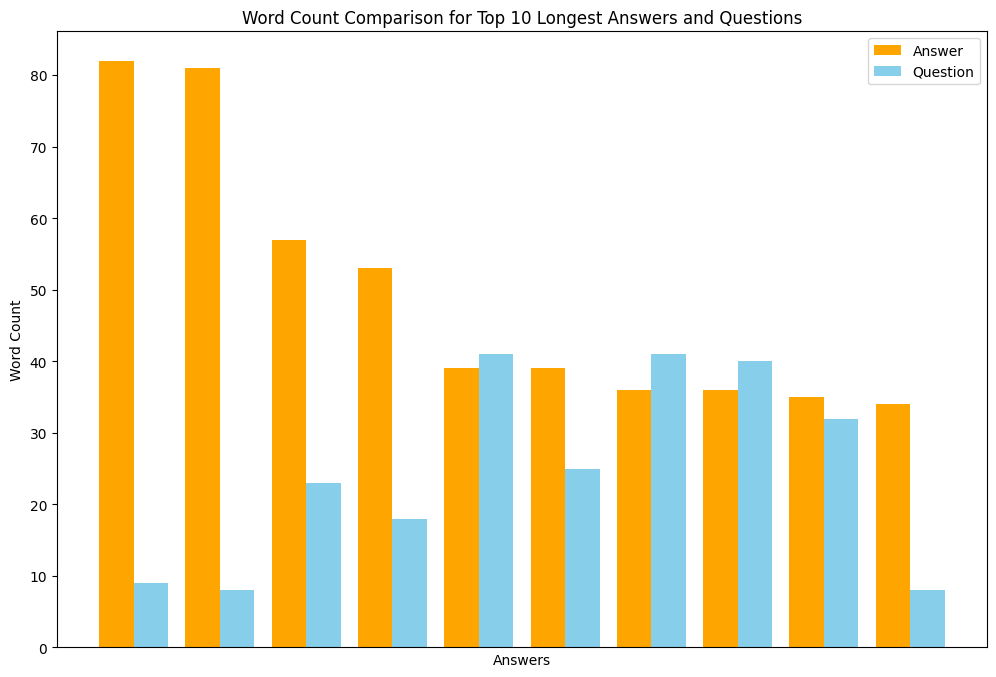

In [134]:
top_10_longest_answers = df.nlargest(10, 'answer_word_count')

# Plotting grouped bar graph
plt.figure(figsize=(12, 8))

# Bar plot for answer word count
plt.bar(bar_positions - bar_width/2, top_10_longest_answers['answer_word_count'], width=bar_width, label='Answer', color='orange')

# Bar plot for question word count next to answers
plt.bar(bar_positions + bar_width/2, top_10_longest_answers['question_word_count'], width=bar_width, label='Question', color='skyblue')

plt.title('Word Count Comparison for Top 10 Longest Answers and Questions')
plt.xlabel('Answers')
plt.ylabel('Word Count')
plt.xticks([])
plt.legend()

plt.show()

In [135]:
top_10_longest_answers[:3]

,question,answer,question_word_count,answer_word_count
8435,List all the locations where net capacity is 950?,SELECT Location Chernobyl 1 Chernobyl 2 Chernobyl 3 Chernobyl 4 Chernobyl 5 Ignalina 1 Ignalina 2 Ignalina 3 Kursk 1 Kursk 2 Kursk 3 Kursk 4 Kursk 5 Kursk 6 Leningrad 1 Leningrad 2 Leningrad 3 Leningrad 4 Smolensk 1 Smolensk 2 Smolensk 3 Smolensk 4 Directorate for Construction of Kostoma NPP (For Kostroma 1 and 2) Table 31. Technology and Soviet Energy Availability - November 1981 - NTIS order #PB82-133455 (For Ignalina 4) FROM table WHERE Net Capacity (MW) = 950,9,82
8436,List all the locations with a RBMK-1000 reactor.,SELECT Location Chernobyl 1 Chernobyl 2 Chernobyl 3 Chernobyl 4 Chernobyl 5 Ignalina 1 Ignalina 2 Ignalina 3 Kursk 1 Kursk 2 Kursk 3 Kursk 4 Kursk 5 Kursk 6 Leningrad 1 Leningrad 2 Leningrad 3 Leningrad 4 Smolensk 1 Smolensk 2 Smolensk 3 Smolensk 4 Directorate for Construction of Kostoma NPP (For Kostroma 1 and 2) Table 31. Technology and Soviet Energy Availability - November 1981 - NTIS order #PB82-133455 (For Ignalina 4) FROM table WHERE Reactor type = RBMK-1000,8,81
709,"What is the compression ratio when the continuous power is hp (KW) at 2,200 RPM and the critical altitude is at sea level?","SELECT COUNT Compression ratio FROM table WHERE Power, continuous = hp (kW) at 2,200 RPM AND Critical altitude This is the highest altitude at which the engine can achieve its full continuous power rating. Above this altitude, power falls off with height as with a naturally aspirated engine . See Supercharger#Altitude effects for details. = sea level",23,57


### 2.1 Observations

- In contrast to the plot depicting the top 10 longest questions and answers, the plot for the top 10 longest answers and their respective questions does not exhibit a consistent pattern.
  
- Exceptions are noticeable, indicating that the length of an answer does not always correspond directly to the length of the associated question.

- The variation in word counts between answers and questions suggests that factors other than question length may influence the length of answers.

- Anomalies in the observed pattern might be attributed to the nature of the dataset, where certain questions necessitate detailed and lengthy answers, while others may elicit more concise responses.

- Understanding the relationship between the lengths of answers and questions is essential for gaining insights into the diversity of information sought in queries and the corresponding range of responses provided.

- Further analysis and exploration may reveal underlying patterns or exceptions in the dataset, shedding light on the dynamics of question-answer relationships.

#### 3. Distribution of Word Counts in Questions and Answers

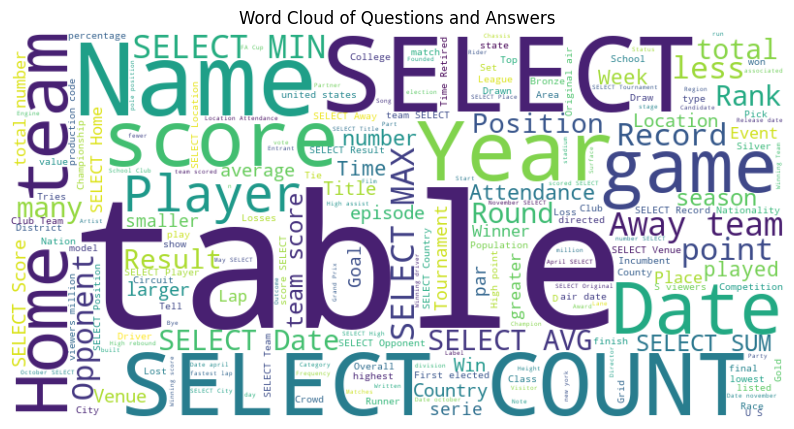

In [136]:
# Unique words
all_text = ' '.join(df['question'] + ' ' + df['answer'])
unique_words = set(all_text.split())

# Word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Questions and Answers')
plt.show()

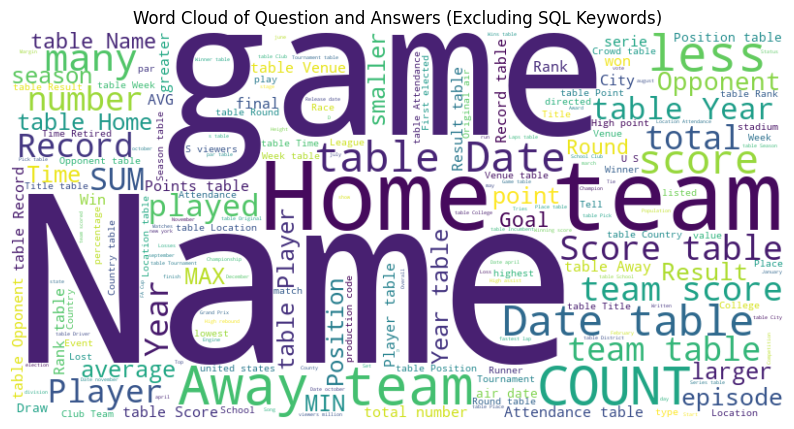

In [137]:
# Remove common SQL keywords
sql_keywords = set(['SELECT', 'FROM', 'WHERE', 'AND', 'OR', 'JOIN', 'INNER', 'OUTER', 'LEFT', 'RIGHT'])
filtered_text = ' '.join([word for word in all_text.split() if word.upper() not in sql_keywords])

# Word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(filtered_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Question and Answers (Excluding SQL Keywords)')
plt.show()

### 3.1 Observations on Word Clouds

#### Word Cloud of Answers (Original)
- The initial word cloud generated from the 'answer' column reveals a significant repetition of SQL keywords, particularly the term 'SELECT.'
- This repetition is likely attributed to the prevalence of SQL queries or code snippets within the answers.
- The word cloud predominantly reflects the technical nature of the content, emphasizing SQL-related terms.
- Dominated by SQL keywords, especially 'SELECT.'
- Reflects the technical and database-oriented nature of the answers.

#### Word Cloud of Answers (Excluding SQL Keywords)
- To obtain a more diverse and informative word cloud, common SQL keywords such as 'SELECT,' 'FROM,' and 'WHERE' were excluded from the text before generating the word cloud.
- The resulting visualization provides a broader perspective on the content, highlighting non-SQL-related terms.
- This allows for a better understanding of the most frequently used words beyond the realm of SQL queries.
- Reveals a more diverse set of terms.
- Common words like 'home,' 'name,' 'team,' 'game,' 'less,' 'score,' 'away,' 'many,' 'number,' etc., stand out.
- Provides insights into the non-SQL-related content and common themes present in the answers.

#### 4. Top 10 Most Common Words and Symbols in Questions and Answers

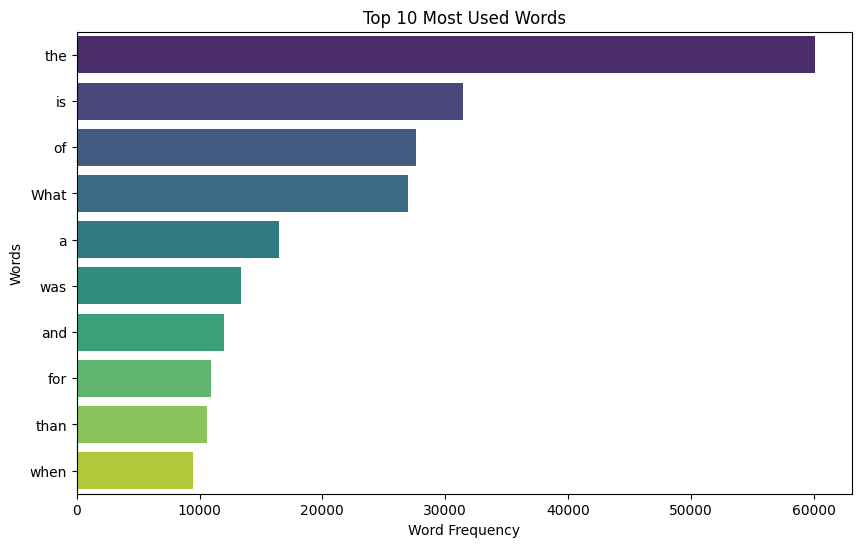

In [138]:
exclude_word = '='
al_text = ' '.join(df['question'])
# Remove the word from the text
filtered_text = ' '.join([word for word in al_text.split() if word.lower() != exclude_word.lower()])

# Count word frequency
word_freq = Counter(filtered_text.split())
most_used_words = word_freq.most_common(10)

# Plotting most used words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_used_words], y=[word[0] for word in most_used_words], palette='viridis')
plt.title('Top 10 Most Used Words'.format(exclude_word))
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.show()

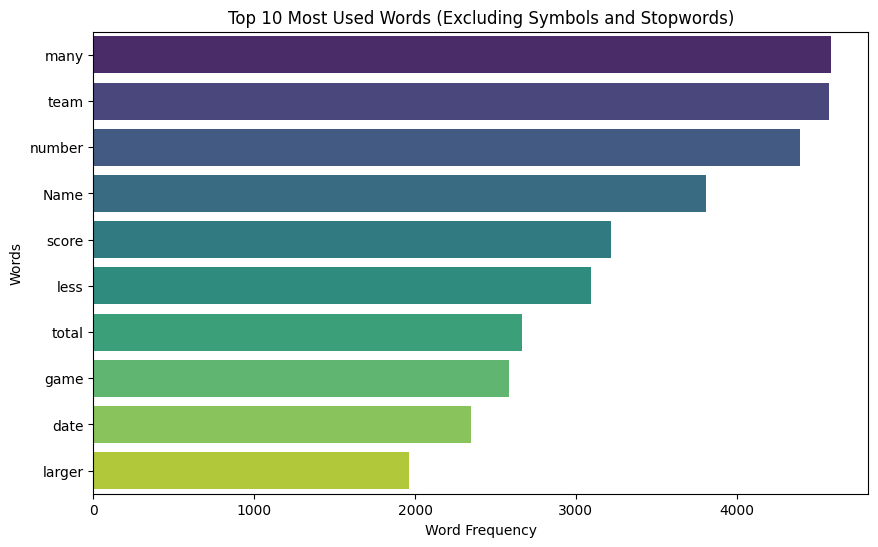

In [140]:

# Concatenate all text into a single string
all_text = ' '.join(df['question'])

# Remove the specified word and filter out stopwords and symbols
filtered_text = ' '.join([word for word in all_text.split() if word.lower() != exclude_word.lower() and word.isalpha() and word.lower() not in STOPWORDS])

# Count word frequency
word_freq = Counter(filtered_text.split())
most_used_words = word_freq.most_common(10)

# Plotting most used words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_used_words], y=[word[0] for word in most_used_words], palette='viridis')
plt.title('Top 10 Most Used Words (Excluding Symbols and Stopwords)')
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.show()

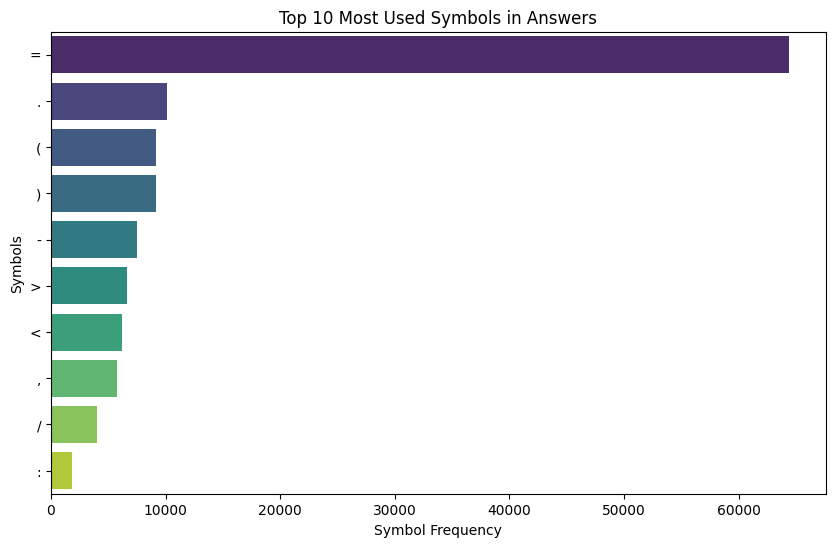

In [142]:
symbols_freq = Counter(''.join(df['answer']).lower())
most_used_symbols = {k: v for k, v in symbols_freq.items() if k.isascii() and not k.isspace() and not k.isalnum() and k not in stopwords.words('english')}
most_used_symbols = Counter(most_used_symbols)

# Get top 10 most used symbols
top_10_symbols = dict(most_used_symbols.most_common(10))

# Plotting top 10 most used symbols
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_10_symbols.values()), y=list(top_10_symbols.keys()), palette='viridis')
plt.title('Top 10 Most Used Symbols in Answers')
plt.xlabel('Symbol Frequency')
plt.ylabel('Symbols')
plt.show()

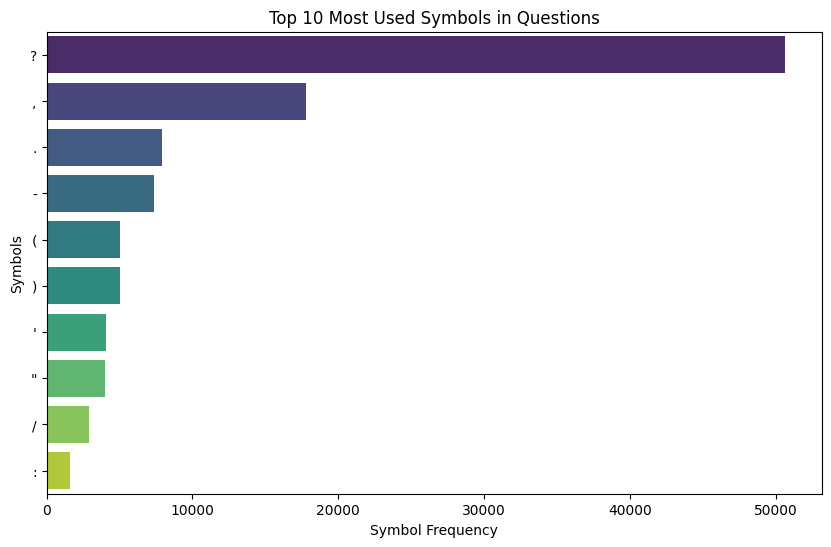

In [144]:
symbols_freq = Counter(''.join(df['question']).lower())
most_used_symbols = {k: v for k, v in symbols_freq.items() if k.isascii() and not k.isspace() and not k.isalnum() and k not in stopwords.words('english')}
most_used_symbols = Counter(most_used_symbols)

# Get top 10 most used symbols
top_10_symbols = dict(most_used_symbols.most_common(10))

# Plotting top 10 most used symbols
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_10_symbols.values()), y=list(top_10_symbols.keys()), palette='viridis')
plt.title('Top 10 Most Used Symbols in Questions')
plt.xlabel('Symbol Frequency')
plt.ylabel('Symbols')
plt.show()

#### 4.1 Observations
- Most Used Words in Questions: 
The word 'many' appears to be the most frequently used word in questions, with a count of 4589.
Common English stopwords such as 'the,' 'is,' 'of,' and 'a' dominate the list, indicating the presence of general language structure in questions.
Noteworthy question-specific terms like 'What,' 'when,' and 'than' are also present, reflecting the diverse nature of the questions.
- Most Used Words in Questions (Without Symbols and Stopwords): 
After excluding symbols and stopwords, the most used words in questions still include terms like 'many,' 'team,' and 'number,' suggesting recurring themes related to these concepts.
Words like 'score,' 'game,' and 'total' become more prominent, indicating a focus on topics related to sports or games.
The removal of symbols and stopwords helps reveal more meaningful and content-specific words.
- Most Used Symbols in Answers: 
The equal sign '=' is the most frequently used symbol in answers, occurring 64393 times.
Other common symbols include period '.', parentheses '()', hyphen '-', and greater than/less than symbols ('>' and '<').
The prevalence of these symbols suggests a significant use of mathematical and programming syntax in the answers.
- Most Used Symbols in Questions: 
The question mark '?' is the most frequently used symbol in questions, appearing 50605 times.
Other frequently used symbols include comma ',', period '.', and hyphen '-'. These symbols are commonly found in sentence structure and punctuation.
The presence of parentheses '()' and quotation marks "'" and '"' indicates the use of these symbols in forming complex queries.